Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Load all 3 datasets from CSV
detroitbikes = pd.read_csv("/Users/zarahbaloch/Downloads/detroitbikes.csv")
foursquare_df = pd.read_csv("foursquare_data.csv")
yelp_df = pd.read_csv("yelp_data.csv")

In [5]:
# Confirm they are loaded properly
print(detroitbikes.head())

                         station_id                       name   latitude  \
0  019fbdf044ddeded277660f9d9c5fb23    E Bethune St & Brush St  42.374231   
1  021d0e9c8fcd21ec32bd3136945ef332        20th St & Bagley St  42.324627   
2  0ad79e03add4ffef597d9a7b51d374be       Agnes St & Parker St  42.355351   
3  0d077ef68550428f754b9685b5750b27   Wabash St & Michigan Ave  42.331483   
4  0d7d5ce52fd3c9eea183caed919e0dd1  *N Main St & Gardenia Ave  42.497780   

   longitude  free_bikes  empty_slots  
0 -83.069759           1           10  
1 -83.080853           5            5  
2 -82.996276           5            9  
3 -83.075110           5            6  
4 -83.144430           4            3  


In [7]:
print(foursquare_df.head())

                         station_id   POI_name   POI_lat    POI_lon  \
0  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
1  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
2  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
3  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
4  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   

     category                                 address  
0  Restaurant  10005 W Warren Ave, Dearborn, MI 48126  
1  Restaurant  10005 W Warren Ave, Dearborn, MI 48126  
2  Restaurant  10005 W Warren Ave, Dearborn, MI 48126  
3  Restaurant  10005 W Warren Ave, Dearborn, MI 48126  
4  Restaurant  10005 W Warren Ave, Dearborn, MI 48126  


In [9]:
print(yelp_df.head())

                         station_id          POI_name  rating  review_count  \
0  019fbdf044ddeded277660f9d9c5fb23        Oak & Reel     4.5           288   
1  019fbdf044ddeded277660f9d9c5fb23             Freya     4.4           110   
2  019fbdf044ddeded277660f9d9c5fb23  See You Tomorrow     4.2            60   
3  019fbdf044ddeded277660f9d9c5fb23       Baobab Fare     4.7           367   
4  019fbdf044ddeded277660f9d9c5fb23           Choixes     2.5            16   

     POI_lat    POI_lon                category  \
0  42.372278 -83.066819                 Italian   
1  42.372169 -83.066983            New American   
2  42.373968 -83.075200      Breakfast & Brunch   
3  42.370077 -83.072813            Coffee & Tea   
4  42.375141 -83.077095  Juice Bars & Smoothies   

                                address  
0  2921 E Grand Blvd, Detroit, MI 48202  
1  2929 E Grand Blvd, Detroit, MI 48202  
2  7760 Woodward Ave, Detroit, MI 48226  
3  6568 Woodward Ave, Detroit, MI 48202  
4  8201 

In [11]:
#creating a merge 
#left join, making sure all detroit bikes rows are present 
#adding in suffixes for overlapping columns (i.e longitude, latitude, etc.)
combinedall = detroitbikes \
    .merge(yelp_df, on="station_id", how="left", suffixes=("", "_yelp")) \
    .merge(foursquare_df, on="station_id", how="left", suffixes=("", "_foursquare"))

#present the columns in the merged df
for col in combinedall.columns:
    print(col)

station_id
name
latitude
longitude
free_bikes
empty_slots
POI_name
rating
review_count
POI_lat
POI_lon
category
address
POI_name_foursquare
POI_lat_foursquare
POI_lon_foursquare
category_foursquare
address_foursquare


In [13]:
combinedall.to_csv("combine_df.csv", index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

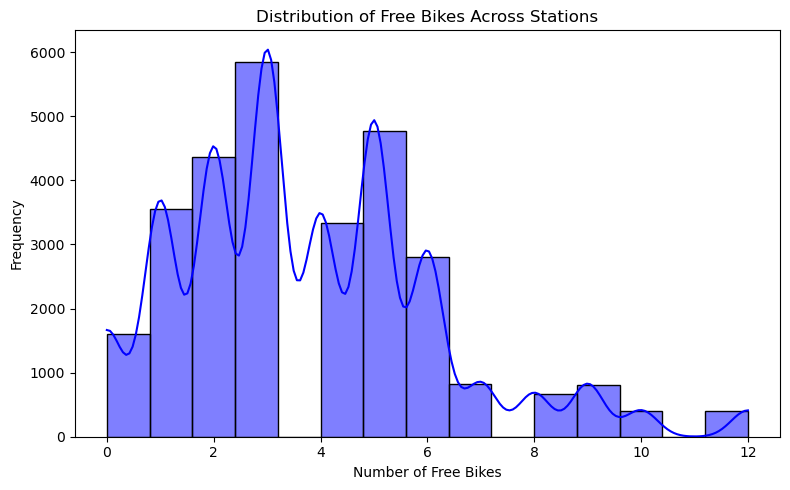

In [16]:
#Visualization 1 
#This graph shows how many bike stations have certain numbers of free bikes.
plt.figure(figsize=(8, 5))
sns.histplot(combinedall['free_bikes'], bins=15, kde=True, color='blue')
plt.title('Distribution of Free Bikes Across Stations')
plt.xlabel('Number of Free Bikes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

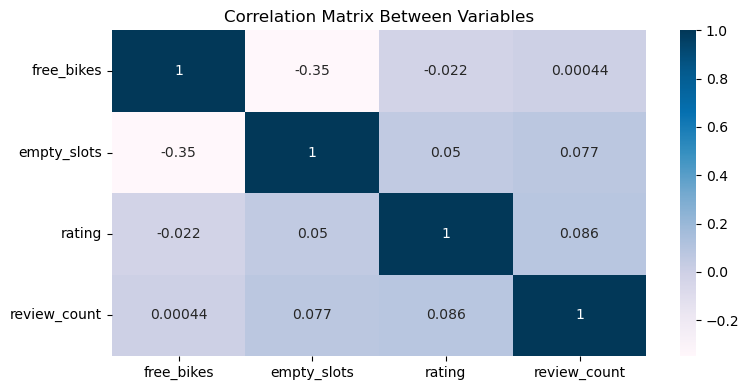

In [22]:
#Visualization 2
#This heatmap shows how different variables are related 
#A value close to +1 means they increase together, and a value close to -1 means when one goes up, the other goes down.

plt.figure(figsize=(8, 4))
correlationdata = combinedall[['free_bikes', 'empty_slots', 'rating', 'review_count']]
sns.heatmap(correlationdata.corr(), annot=True, cmap='PuBu')
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()

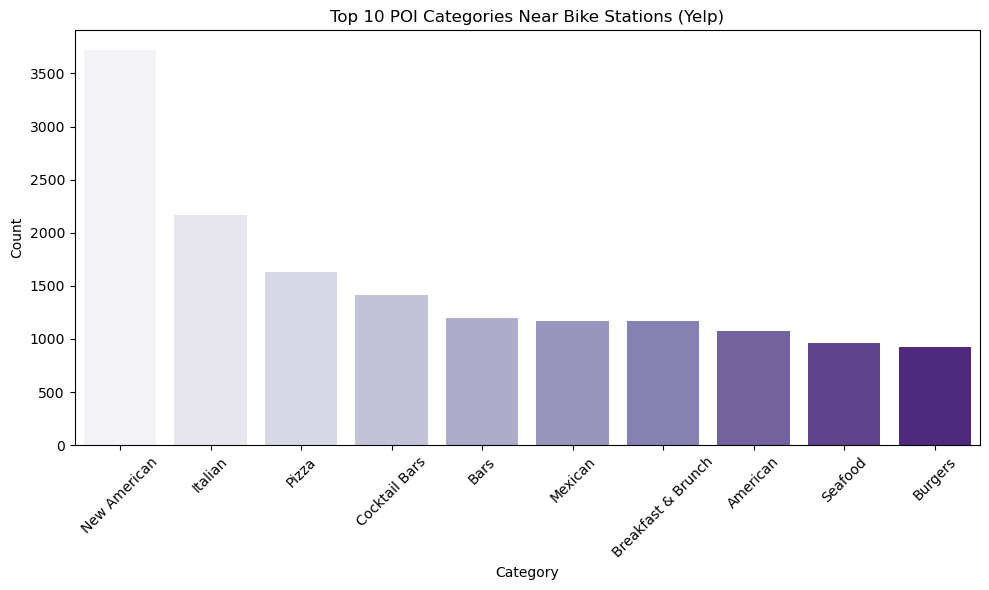

In [24]:
#Visualization 3
#This bar plot visualizes the top 10 most frequent categories of POIs near bike stations, based on Yelp data
plt.figure(figsize=(10, 6))
poi_counts = combinedall['category'].value_counts().head(10)
sns.barplot(x=poi_counts.index, y=poi_counts.values, hue=poi_counts.index, palette='Purples', legend=False)
plt.title('Top 10 POI Categories Near Bike Stations (Yelp)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [28]:
import os
import sqlite3
import pandas as pd

# Defining the project + data directory
project_dir = os.path.expanduser('~/Documents/GitHub/zarahbaloch/Statistical-Modelling-with-Python')
data_dir = os.path.join(project_dir, 'data')
os.makedirs(data_dir, exist_ok=True)

# Creates a path to the SQLite database file 
#The file will be created in the /data folder
db_path = os.path.join(data_dir, 'bike_poi_data.db')

# connects the db to a path + creates a cursor object
conn = sqlite3.connect(db_path)
cursor = conn.cursor()


In [30]:
#SQLite table creation 

#Drops tables if already created to prevent schema conflicts when carrying out re-runs
cursor.execute("DROP TABLE IF EXISTS bike_stations")

#structure of the 'bike_stations' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id TEXT PRIMARY KEY,
    Name TEXT,
    Latitude REAL,
    Longitude REAL,
    Free_Bikes INTEGER,
    Empty_Slots INTEGER
)
''')

# structure of the 'fsq_pois' (Foursquare POI) table
cursor.execute('''
CREATE TABLE IF NOT EXISTS fsq_pois (
    POI_ID TEXT PRIMARY KEY,
    Name TEXT,
    Rating TEXT,
    Latitude REAL,
    Longitude REAL,
    Address TEXT,
    Category TEXT,
    Distance INTEGER,
    station_id TEXT,
    FOREIGN KEY (Station_ID) REFERENCES bike_stations(Station_ID)
)
''')

# # structure of the 'yelp_pois' (Yelp POI) table
cursor.execute('''
CREATE TABLE IF NOT EXISTS yelp_pois (
    POI_ID TEXT PRIMARY KEY,
    Name TEXT,
    Rating REAL,
    Latitude REAL,
    Longitude REAL,
    Address TEXT,
    Category TEXT,
    Distance INTEGER,
    station_id TEXT,
    FOREIGN KEY (station_id) REFERENCES bike_stations(Station_ID)
)
''')


In [32]:
#iterates each row in the df
#inserts the station data into the bike_stations table in the SQLite database.
for _, row in detroitbikes.iterrows():
    #if a station with the same station_id already exists, it is replaced with the new data.
    cursor.execute('''
    INSERT OR REPLACE INTO bike_stations (station_id, Name, Latitude, Longitude, Free_Bikes, Empty_Slots)
    VALUES (?, ?, ?, ?, ?, ?)
    ''', (
        row['station_id'],
        row['name'],
        row['latitude'],
        row['longitude'],
        row['free_bikes'],
        row['empty_slots']
    ))

#This is repeated with yelp & foursquare df as well. 

In [34]:
for _, row in foursquare_df.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO fsq_pois (POI_ID, Rating, Latitude, Longitude, Address, Category, Station_ID)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['POI_name'],
        row.get('rating', None),
        row['POI_lat'],
        row['POI_lon'],
        row.get('address', None),
        row['category'],
        row['station_id']
    ))


In [36]:
for _, row in yelp_df.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO yelp_pois (
        POI_ID, Rating, Latitude, Longitude, Address, Category, Station_ID
    )
    VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (        
        row['POI_name'],
        row['rating'],
        row['POI_lat'],
        row['POI_lon'],
        row['address'],
        row['category'],
        row['station_id']
    ))


Look at the data before and after the join to validate your data.

In [39]:
# Before Join
print("Bike Stations (detroitbikes):")
print(detroitbikes.head())

print("\nFoursquare POIs:")
print(foursquare_df.head())

print("\nYelp POIs:")
print(yelp_df.head())

# Merge: Foursquare POIs with bike stations
fsq_combined = pd.merge(foursquare_df, detroitbikes, on='station_id', how='left')
print("\nCombined Foursquare Data:")
print(fsq_combined.head())
print("\nMissing Values Check (Foursquare):")
print(fsq_combined.isnull().sum())

# Merge: Yelp POIs with bike stations
yelp_combined = pd.merge(yelp_df, detroitbikes, on='station_id', how='left')
print("\nCombined Yelp Data:")
print(yelp_combined.head())
print("\nMissing Values Check (Yelp):")
print(yelp_combined.isnull().sum()) 

Bike Stations (detroitbikes):
                         station_id                       name   latitude  \
0  019fbdf044ddeded277660f9d9c5fb23    E Bethune St & Brush St  42.374231   
1  021d0e9c8fcd21ec32bd3136945ef332        20th St & Bagley St  42.324627   
2  0ad79e03add4ffef597d9a7b51d374be       Agnes St & Parker St  42.355351   
3  0d077ef68550428f754b9685b5750b27   Wabash St & Michigan Ave  42.331483   
4  0d7d5ce52fd3c9eea183caed919e0dd1  *N Main St & Gardenia Ave  42.497780   

   longitude  free_bikes  empty_slots  
0 -83.069759           1           10  
1 -83.080853           5            5  
2 -82.996276           5            9  
3 -83.075110           5            6  
4 -83.144430           4            3  

Foursquare POIs:
                         station_id   POI_name   POI_lat    POI_lon  \
0  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
1  019fbdf044ddeded277660f9d9c5fb23  Tuff Taco  42.34424 -83.157737   
2  019fbdf044ddeded277660f9d9c5fb23 

In [226]:
conn.commit()  
conn.close()   

print(f"Database successfully populated and saved at: {db_path}")

Database successfully populated and saved at: /Users/zarahbaloch/Documents/GitHub/zarahbaloch/Statistical-Modelling-with-Python/data/bike_poi_data.db
